In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset
dataset = pd.read_csv(r"C:\Users\Dell\Downloads\salary_2d_dataset.csv")
dataset

,Experience,Skill_Level,Salary
0,0.5,2,279152
1,1.0,4,461984
2,1.5,2,389453
3,2.0,5,688179
4,2.5,3,614144
5,3.0,2,645645
6,3.5,4,843878
7,4.0,3,790226
8,4.5,5,1115000
9,5.0,3,968300


In [3]:
# Dependent & Independent Variable
x = dataset.iloc[:,0:2].values
y = dataset.iloc[:,2].values

In [4]:
# Train-Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
for depth in range(2,7):
    regressor = XGBRegressor(n_estimators=150, learning_rate=0.1, max_depth=depth, random_state=0)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    print("Depth:", depth, "R2:", r2_score(y_test, y_pred))

Depth: 2 R2: 0.972569465637207
Depth: 3 R2: 0.9792523980140686
Depth: 4 R2: 0.9818957448005676
Depth: 5 R2: 0.9821289777755737
Depth: 6 R2: 0.9829320311546326


In [6]:
for lr in [0.3, 0.1, 0.05]:
    regressor = XGBRegressor(n_estimators=200, learning_rate=lr, max_depth=4,random_state=0)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    print("LR:", lr, "R2:", r2_score(y_test, y_pred))

LR: 0.3 R2: 0.9783774614334106
LR: 0.1 R2: 0.9816713333129883
LR: 0.05 R2: 0.9817050099372864


In [7]:
regressor = XGBRegressor(n_estimators = 100, learning_rate = 0.05, max_depth = 6, random_state = 0)
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [12]:
# Prediction
y_pred = regressor.predict(x_test)

In [20]:
y_14 = regressor.predict([[14,3]]) # 14 years experience, skill level 3

In [15]:
# Prediction for 6.5 years
print("salary for 14 years:",y_14)

salary for 14 years: [2238062.5]


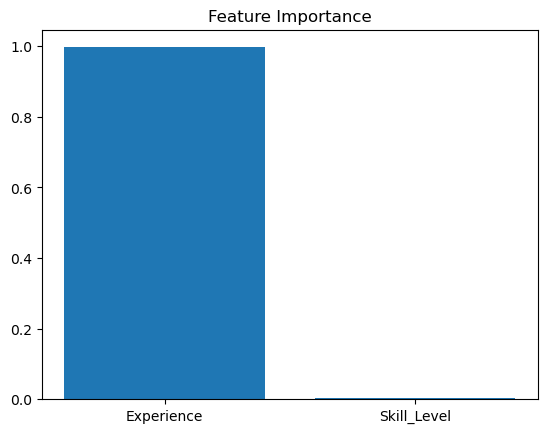

In [26]:
   # Used to see which feature influences prediction most
regressor.feature_importances_

plt.bar(['Experience', 'Skill_Level'], regressor.feature_importances_)
plt.title("Feature Importance")
plt.show()

In [17]:
# Evaluation
from sklearn.metrics import mean_squared_error, r2_score


print("Final MSE:", mean_squared_error(y_test, y_pred))
print("Final R2:", r2_score(y_test, y_pred))

Final MSE: 5469099520.0
Final R2: 0.9833458065986633


In [18]:
bias = regressor.score(x_train, y_train)
print(bias)

0.9990957975387573


In [19]:
variance = regressor.score(x_test, y_test)
print(variance)

0.9833458065986633
